In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob  # for sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
items_df = pd.read_csv('/content/drive/MyDrive/20191226-items.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/20191226-reviews.csv')

In [6]:
items_df.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [11]:
items_df.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [7]:
reviews_df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [12]:
reviews_df.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body',
       'helpfulVotes'],
      dtype='object')

In [13]:
merged_df = pd.merge(reviews_df, items_df, left_on='asin', right_on='asin', how='inner')

In [18]:
merged_df['body'].fillna('NA', inplace=True)

In [19]:
merged_df['Sentiment'] = merged_df['body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
merged_df['Sentiment_Label'] = merged_df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [20]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(merged_df['body'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)
merged_df['Topic'] = lda.transform(dtm).argmax(axis=1)

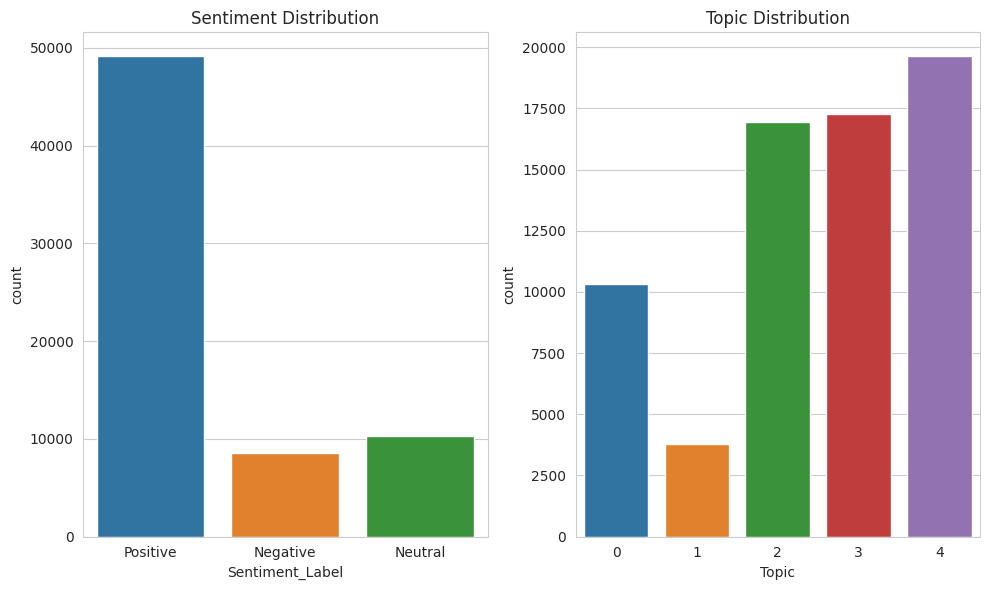

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Example visualizations (customize based on your analysis goals)
plt.subplot(1, 2, 1)
sns.countplot(x='Sentiment_Label', data=merged_df)
plt.title('Sentiment Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Topic', data=merged_df)
plt.title('Topic Distribution')

plt.tight_layout()
plt.show()


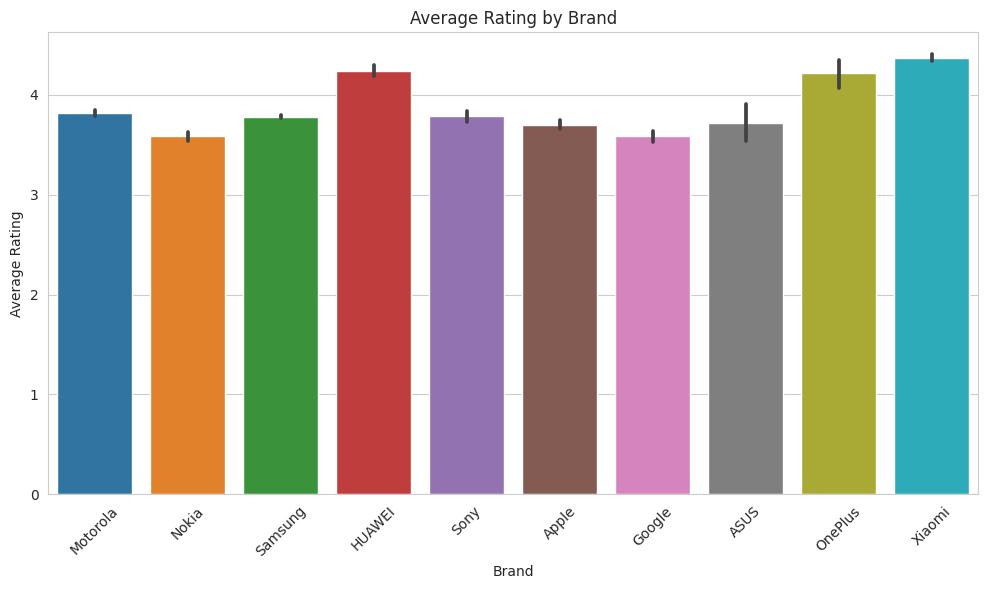

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='rating_x', data=merged_df)
plt.title('Average Rating by Brand')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()

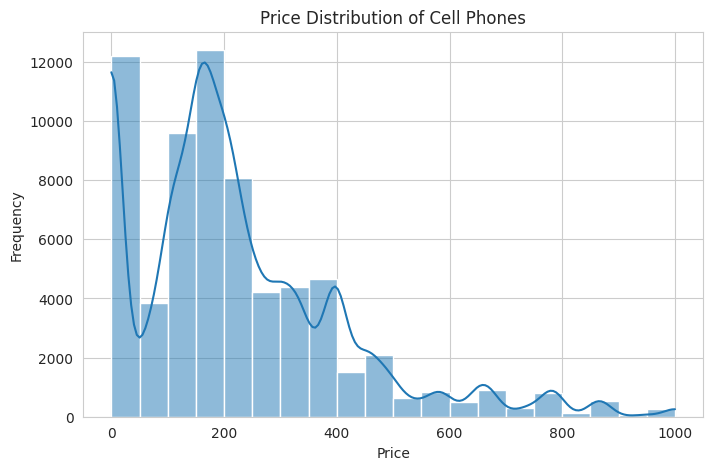

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['price'], bins=20, kde=True)
plt.title('Price Distribution of Cell Phones')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

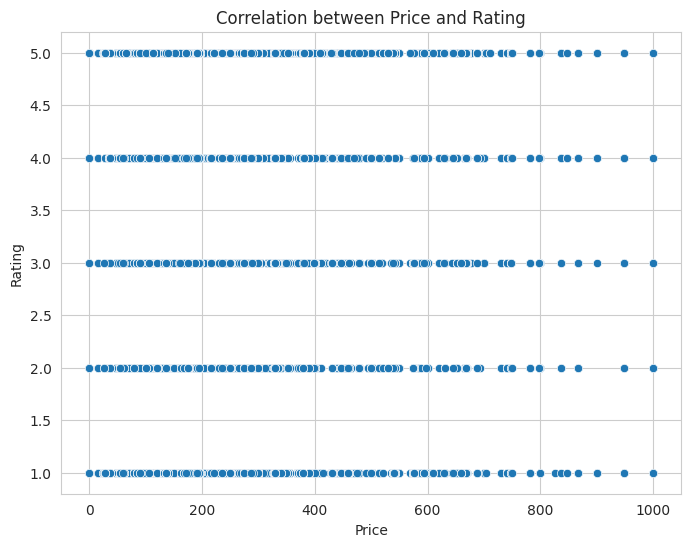

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='rating_x', data=merged_df)
plt.title('Correlation between Price and Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

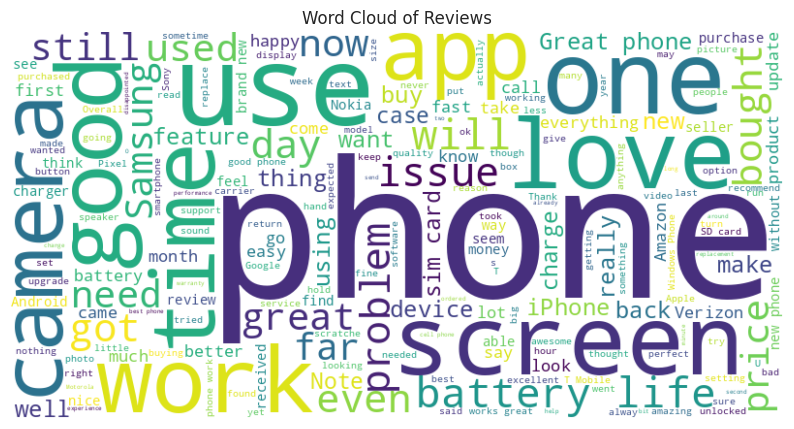

In [25]:
from wordcloud import WordCloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(merged_df['body']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


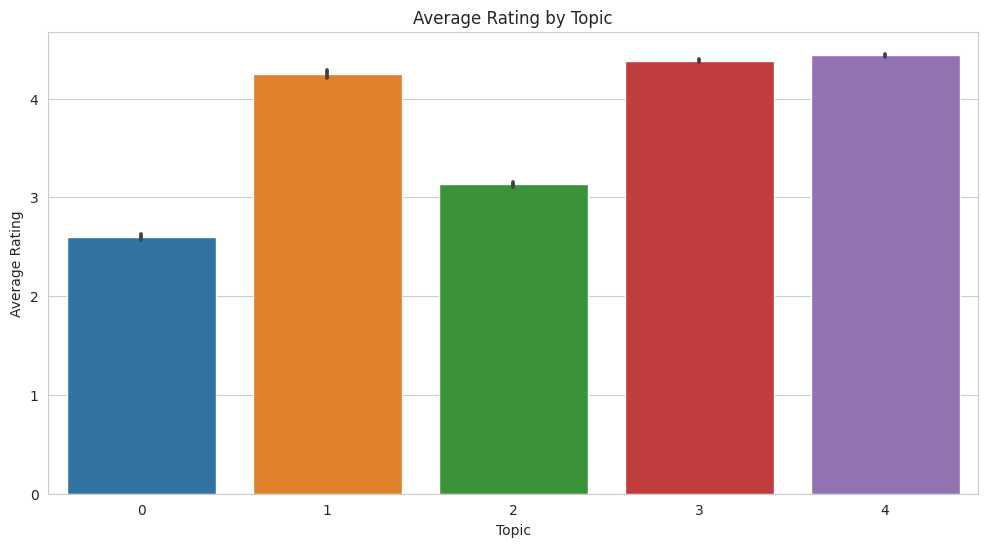

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Topic', y='rating_x', data=merged_df)
plt.title('Average Rating by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Rating')
plt.show()

In [32]:
# Save merged_df to a CSV file
merged_df.to_csv('merged_data.csv', index=False)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    merged_df['body'], merged_df['Sentiment_Label'], test_size=0.2, random_state=42
)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Predict sentiment labels
y_pred = clf.predict(X_test_tfidf)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8020297102515076
              precision    recall  f1-score   support

    Negative       0.74      0.24      0.37      1709
     Neutral       0.93      0.38      0.54      1984
    Positive       0.80      0.98      0.88      9905

    accuracy                           0.80     13598
   macro avg       0.82      0.53      0.59     13598
weighted avg       0.81      0.80      0.77     13598



In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = merged_df[['rating_x', 'totalReviews']]  # Add more features as needed
y = merged_df['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict prices
y_pred = lr.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 34926.213119463624
R-squared: 0.003058992086776846


In [35]:
import pandas as pd
import numpy as np

# Load your analyzed data with 'body' and 'Sentiment_Label' columns
data = pd.read_csv('merged_data.csv')

# Handle missing values in the 'body' column by replacing NaN with an empty string
data['body'].fillna('', inplace=True)

# Split data into train and test sets
X = data['body']
y = data['Sentiment_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize text data
max_words = 5000  # Maximum number of unique words to consider
tokenizer = Tokenizer(num_words=max_words)
# Convert to strings to handle any remaining NaN values
X_train = X_train.astype(str)
X_test = X_test.astype(str)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100  # Maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Encode sentiment labels
y_train_encoded = to_categorical(y_train.map({'Positive': 0, 'Neutral': 1, 'Negative': 2}))
y_test_encoded = to_categorical(y_test.map({'Positive': 0, 'Neutral': 1, 'Negative': 2}))


# Build an RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # 3 output classes (Positive, Neutral, Negative)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_encoded, validation_data=(X_test_pad, y_test_encoded), epochs=5, batch_size=64)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/5
850/850 [==============================] - 131s 151ms/step - loss: 0.3232 - accuracy: 0.8802 - val_loss: 0.1961 - val_accuracy: 0.9314
Epoch 2/5
850/850 [==============================] - 122s 143ms/step - loss: 0.1576 - accuracy: 0.9465 - val_loss: 0.1552 - val_accuracy: 0.9487
Epoch 3/5
850/850 [==============================] - 118s 139ms/step - loss: 0.1230 - accuracy: 0.9607 - val_loss: 0.1545 - val_accuracy: 0.9504
Epoch 4/5
850/850 [==============================] - 119s 140ms/step - loss: 0.1011 - accuracy: 0.9684 - val_loss: 0.1600 - val_accuracy: 0.9488
Epoch 5/5
425/425 [==============================] - 7s 17ms/step - loss: 0.1806 - accuracy: 0.9504
Test Loss: 0.18061837553977966
Test Accuracy: 0.9503603577613831
